In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
data = pd.read_csv("data_clustering.csv",index_col=0)
data

,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,R_Choice
Unnamed: 0,,,,,,,,,,,,,,,
AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.278531,-0.131304,-0.595262,1.540009,0.812922,-0.004024,-0.168026,0.0
AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.278531,-0.131304,-0.595262,0.744938,-0.846312,-0.002532,-0.219892,0.0
AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.278531,-0.131304,-0.595262,1.524391,-0.148899,-0.007150,-0.178880,0.0
AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.278531,-0.131304,-0.595262,1.370326,-0.250561,-0.008906,-0.153122,0.0
AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.278531,-0.131304,-0.595262,1.381785,0.824350,-0.008661,-0.417218,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,0.391204,-2.275119,-0.595262,0.052004,0.548059,-0.010275,-0.017865,0.0
ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,0.391204,-2.275119,-0.595262,1.185963,0.920323,-0.010203,-0.017878,0.0
ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,0.391204,-2.275119,-0.595262,-0.061621,-0.623138,-0.011100,-0.017870,0.0


In [9]:
pca = PCA(n_components = 7)
pca.fit(data)
scores_pca = pca.transform(data)

### K-means clustering with PCA

In [10]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

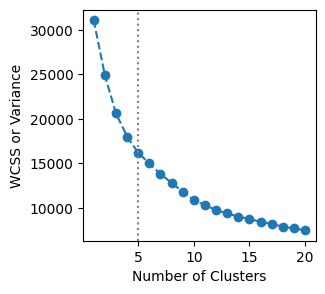

In [12]:
plt.figure(figsize = (3,3))
plt.plot(range(1,21),wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS or Variance")
plt.axvline(5,color="gray",linestyle=":")
plt.savefig("cluster_number.png",dpi=600, bbox_inches='tight')

In [46]:
ncluster = 5
kmeans_pca2 = KMeans(n_clusters = ncluster, init = "k-means++", random_state = 42)
kmeans_pca2.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [54]:
df_pca_kmeans = pd.concat([data.reset_index(),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans["Segment K-means PCA"] = kmeans_pca2.labels_
df_pca_kmeans

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,...,NetValue_Gas_Import,R_Choice,0,1,2,3,4,5,6,Segment K-means PCA
0,AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.278531,-0.131304,...,-0.168026,0.0,-1.106275,0.949569,-0.757268,0.711425,-0.543739,1.240417,0.977352,1
1,AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.278531,-0.131304,...,-0.219892,0.0,-0.392291,1.058590,-0.839246,0.111290,-1.400560,0.685661,-0.008270,1
2,AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.278531,-0.131304,...,-0.178880,0.0,-0.751716,1.122318,-0.856642,0.426698,-1.252600,1.274748,0.457875,1
3,AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.278531,-0.131304,...,-0.153122,0.0,-0.679614,1.098374,-0.861544,0.363532,-1.261488,1.163414,0.397091,1
4,AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.278531,-0.131304,...,-0.417218,0.0,-0.936670,1.046424,-0.606880,0.781057,-0.717400,1.244098,1.147634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,0.391204,-2.275119,...,-0.017865,0.0,-0.596300,-2.027587,-1.182324,1.136539,0.055184,0.012660,0.098402,0
2782,ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,0.391204,-2.275119,...,-0.017878,0.0,-0.883649,-1.903669,-1.304472,1.485608,-0.171737,0.886731,0.372182,0
2783,ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,0.391204,-2.275119,...,-0.017870,0.0,-0.142663,-1.902657,-1.297691,0.777994,-0.761659,-0.034533,-0.548157,0
2784,ZWE-2020,-0.282271,-0.385317,-0.307092,0.518474,0.902496,-1.003199,-0.364249,0.391204,-2.275119,...,-0.017885,0.0,-0.359231,-1.946274,-1.259778,1.056791,-0.508273,0.268713,-0.071359,0


<Axes: xlabel='NetValue_Gas_Import', ylabel='NetValue_Coal_Import'>

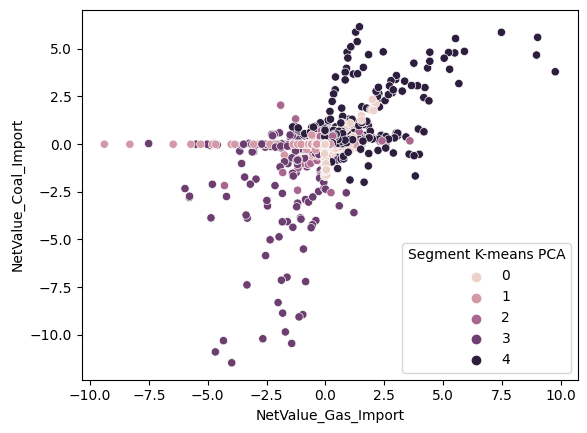

In [55]:
from cmcrameri import cm
sns.scatterplot(x=df_pca_kmeans["NetValue_Gas_Import"],y=df_pca_kmeans["NetValue_Coal_Import"],
                hue=df_pca_kmeans["Segment K-means PCA"],color=cm.batlowS)

In [57]:
df_pca_kmeans[["cntry","year"]] = df_pca_kmeans["Unnamed: 0"].str.split("-",expand=True)
df_pca_kmeans["year"] = df_pca_kmeans["year"].astype(int)
df_pca_kmeans.set_index("Unnamed: 0").to_csv("pca7_cluster5_2.csv")
df_pca_kmeans

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,...,0,1,2,3,4,5,6,Segment K-means PCA,cntry,year
0,AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.278531,-0.131304,...,-1.106275,0.949569,-0.757268,0.711425,-0.543739,1.240417,0.977352,1,AGO,2017
1,AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.278531,-0.131304,...,-0.392291,1.058590,-0.839246,0.111290,-1.400560,0.685661,-0.008270,1,AGO,2018
2,AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.278531,-0.131304,...,-0.751716,1.122318,-0.856642,0.426698,-1.252600,1.274748,0.457875,1,AGO,2019
3,AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.278531,-0.131304,...,-0.679614,1.098374,-0.861544,0.363532,-1.261488,1.163414,0.397091,1,AGO,2020
4,AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.278531,-0.131304,...,-0.936670,1.046424,-0.606880,0.781057,-0.717400,1.244098,1.147634,1,AGO,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,0.391204,-2.275119,...,-0.596300,-2.027587,-1.182324,1.136539,0.055184,0.012660,0.098402,0,ZWE,2017
2782,ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,0.391204,-2.275119,...,-0.883649,-1.903669,-1.304472,1.485608,-0.171737,0.886731,0.372182,0,ZWE,2018
2783,ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,0.391204,-2.275119,...,-0.142663,-1.902657,-1.297691,0.777994,-0.761659,-0.034533,-0.548157,0,ZWE,2019
2784,ZWE-2020,-0.282271,-0.385317,-0.307092,0.518474,0.902496,-1.003199,-0.364249,0.391204,-2.275119,...,-0.359231,-1.946274,-1.259778,1.056791,-0.508273,0.268713,-0.071359,0,ZWE,2020
